# NASDAQ predictions :

#### Our goal here is to use linear regression to predict the price of a stock (NASDAQ index) over a short to medium term.
###### Kaggle member : @Alex_NAT
###### Email : alex.cornec@hotmail.fr

#### First we need to know if we can predict using Linear regression ? And how accurate are our predictions ?

In [1]:
# import libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
#Get NASDAQ values from pre-downloaded CSV file from November 11th 2016 to January 17th 2018

df = pd.read_csv('NASDAQ Composite Historical Data.csv', index_col = 0, skiprows=0)
df=df.reset_index()
print(df.shape)
df.head(5) #show first 5 rows

(302, 8)


,Date_m,Date,Price,Open,High,Low,Vol.,Change %
0,42677,03-Nov-16,5058.41,5104.70,5115.06,5053.52,471.92M,-0.92
1,42678,04-Nov-16,5046.37,5034.41,5087.51,5034.41,478.36M,-0.24
2,42681,07-Nov-16,5166.17,5128.99,5169.41,5122.77,456.10M,2.37
3,42682,08-Nov-16,5193.49,5154.99,5214.17,5145.30,395.69M,0.53
4,42683,09-Nov-16,5251.07,5143.86,5258.99,5143.86,673.59M,1.11


In [12]:
# Keep only price and integerized dates (Price and date_m)

df=df.drop("Date",axis=1,inplace=False);
df=df.drop("Vol.",axis=1,inplace=False);
df=df.drop("Change %",axis=1,inplace=False);
df=df.drop("Low",axis=1,inplace=False);
df=df.drop("High",axis=1,inplace=False);
df=df.drop("Open",axis=1,inplace=False);
y =  df["Price"]
X = df.drop(["Price"],axis=1,inplace=False)
df.head(5) #show first 5 rows

,Date_m,Price
0,42677,5058.41
1,42678,5046.37
2,42681,5166.17
3,42682,5193.49
4,42683,5251.07


In [4]:
#Train and test to make Linear regression to make predictions according to dates

import numpy as np
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

print("train set shape: %s, %s" %(X_train.shape[0],y_train.shape[0]) )
print("test set shape: %s, %s" %(X_test.shape[0],y_train.shape[0]) )
from sklearn import linear_model
reg = linear_model.Lasso(alpha = 0.1)
reg.fit(X_train, y_train)


from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import math
y_pred = reg.predict(X_test)  # predict the demand for X_test
mse = mean_squared_error(y_test, y_pred)  # Real vs predicted demand for X_test
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)
print("pred set shape: %s" %(y_pred.shape[0]) )
print ('mse = {}, rmse = {} \nmae = {} r2 = {}'.format(mse,math.sqrt(mse), mae, r2))



C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


train set shape: 211, 211
test set shape: 91, 211
pred set shape: 91
mse = 8716.12108202929, rmse = 93.36016860540308 
mae = 73.21193702996119 r2 = 0.9674500839199026


#### As you can see we had an R2 accuracy of 96.7% , which means our model is highly accurate

#### Now we will make predictions into the near-future :

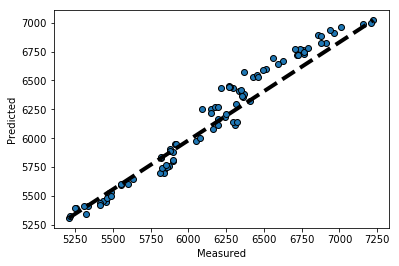

In [5]:
#Plot errors of past predicted values - real past values

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [7]:
#Train linear regression with all data (no test data)

import numpy as np
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.0, random_state=123)


print("train set shape: %s, %s" %(X_train.shape[0],y_train.shape[0]) )
print("test set shape: %s, %s" %(X_test.shape[0],y_train.shape[0]) )
from sklearn import linear_model
reg = linear_model.Lasso()
reg.fit(X_train, y_train)

train set shape: 302, 302
test set shape: 0, 302


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

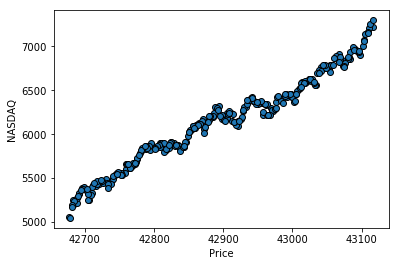

In [8]:
#Show stock performance of NASDAQ

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(X_train,y_train, edgecolors=(0, 0, 0))
ax.set_xlabel('Price')
ax.set_ylabel('NASDAQ')
plt.show()


In [9]:
#List of future dates

df = pd.read_csv('Dates2predict.csv', index_col = 0, skiprows=0)
df=df.reset_index()
X_test = df

X_test.head(10)


,Date_m
0,43109
1,43110
2,43111
3,43112
4,43113
5,43114
6,43115
7,43116
8,43117
9,43118


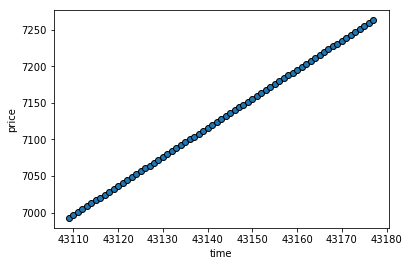

In [10]:
#Make predictions of stock price according to future dates

y_pred = reg.predict(X_test)

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(X_test,y_pred, edgecolors=(0, 0, 0))
ax.set_xlabel('time')
ax.set_ylabel('price')
plt.show()

prediction = pd.DataFrame(X_test,y_pred).to_csv('prediction_NASDAQ.csv')

# Predictions saved to the "prediction_NASDAQ.csv" file

##### Now that our predictions are done, we can put the data to predicts the price of Bitcoins in my other Kernel "Bitcoin_Predictions"